In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("Datasets for NPV/Team 3/earthquake.csv")

In [5]:
df = pd.read_csv('Datasets for NPV/Team 3/earthquake.csv').drop_duplicates()
df[["Day","Month","Year"]]= df["Date"].str.split("/",expand=True)

#Data Cleaning 
#1.Drop Unnecessary Column 
df.drop(
    columns=['Date','Latitude','Longitude','Depth Seismic Stations','Day','Month','ID','Location Source','Depth',
             'Latitude','Longitude','Horizontal Distance','Depth Seismic Stations','Time','Depth Error','Magnitude Error',
             'Horizontal Error','Status','Magnitude Seismic Stations','Azimuthal Gap','Root Mean Square'],inplace=True)
#2.Replace NaN values
df.Magnitude.fillna(df['Magnitude'].mean(),inplace=True)

#Derive Column and map it to the DataFrame
print("Maximum Magnitude:",df.Magnitude.max())
print("Minimum Magnitude:",df.Magnitude.min())
def calculateintensity(x):
    if x < 6:
        return 'Low'
    elif ( x >= 6 ) & ( x < 7 ):
        return 'Medium'
    elif x >= 7:
        return 'High'
 
df['Intensity'] = df['Magnitude'].map(calculateintensity)
dff1=pd.pivot_table(df,index=["Year",'Magnitude Type'],columns='Intensity')
df1=dff1.fillna(method='bfill')
df1

Maximum Magnitude: 9.1
Minimum Magnitude: 5.5


Magnitude                    
Intensity                High       Low    Medium
Year Magnitude Type                              
1965 MW              7.466667  5.732828  6.254472
1966 ML              7.444444  5.620000  6.350000
     MW              7.444444  5.727966  6.272381
1967 MW              7.109091  5.727211  6.297938
1968 ML              7.322727  5.575000  6.260448
...                       ...       ...       ...
2016 MW              7.412500  5.640000  6.000000
     MWB             7.412500  5.565854  6.000000
     MWC             7.412500  5.587500  6.286822
     MWR             7.412500  5.600000  6.286822
     MWW             7.412500  5.695595  6.286822

[246 rows x 3 columns]

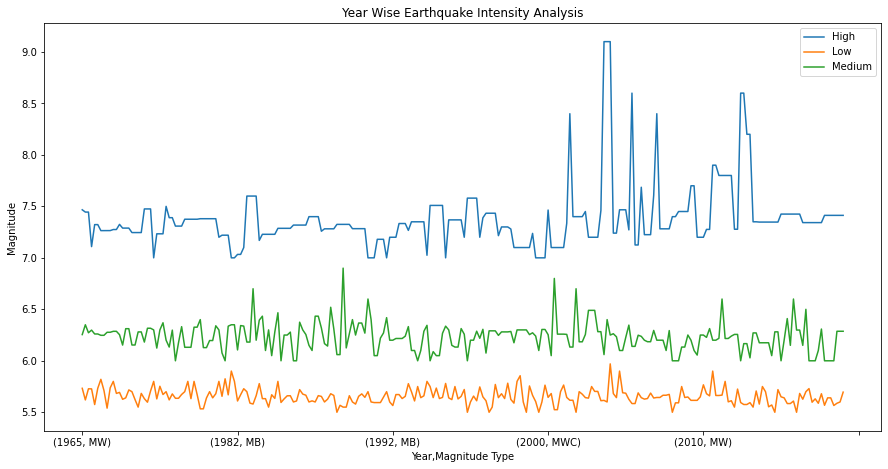

In [6]:
df1.Magnitude.plot(figsize=(15,7.5))
plt.ylabel('Magnitude')
plt.title("Year Wise Earthquake Intensity Analysis")
plt.legend()

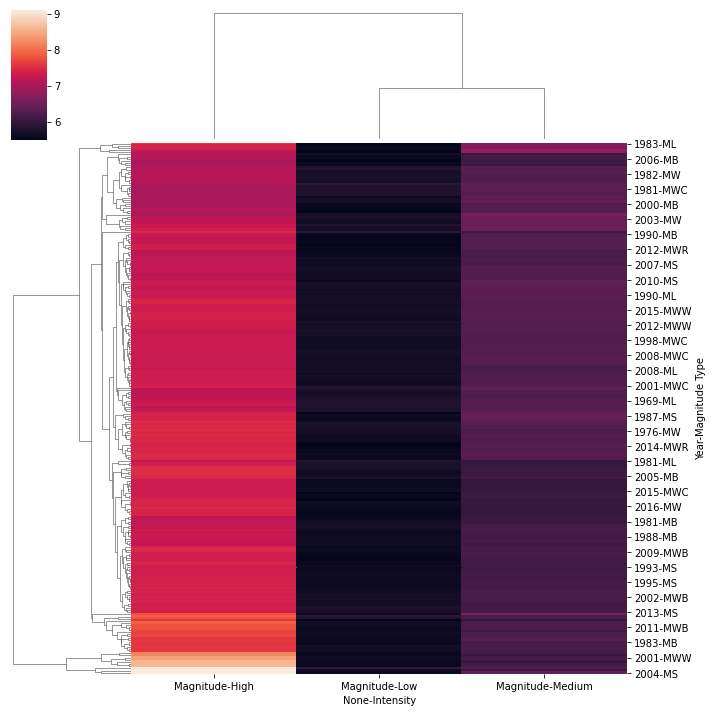

In [7]:
sns.clustermap(data=df1)

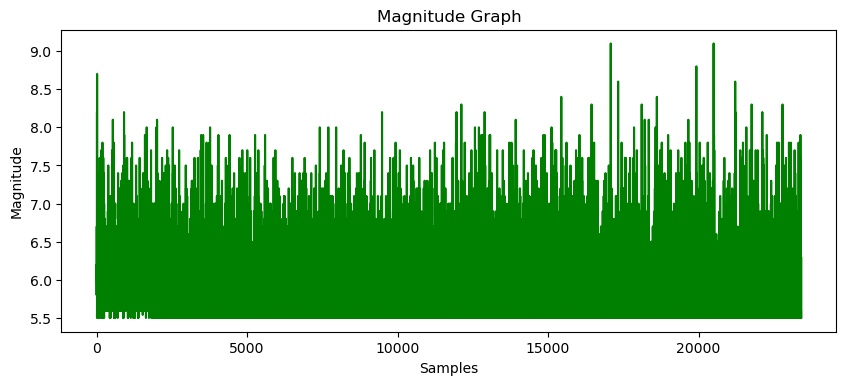

In [8]:
df = pd.read_csv("Datasets for NPV/Team 3/earthquake.csv")
#Uni-variet plot showing the magnitude of the earthquake across dataset
plt.figure(figsize=(10,4), dpi=100)
df.Magnitude.plot(kind='line', color='g')
plt.xlabel('Samples')
plt.ylabel('Magnitude')
plt.title('Magnitude Graph')
plt.savefig('Magnitude Graph.png')

Before: Elements with nan in Mangnitude Type

            Date      Time  Latitude  Longitude        Type  Depth  \
6703  08/24/1983  13:36:00   40.3732  -124.9227  Earthquake  11.93   
7294  11/23/1984  18:08:00   37.4600  -118.5900  Earthquake   9.00   
7919  03/31/1986  11:55:00   37.4788  -121.6858  Earthquake   9.17   

      Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
6703          NaN                     NaN       5.70            NaN  ...   
7294          NaN                     NaN       5.82            NaN  ...   
7919          NaN                     NaN       5.60            NaN  ...   

      Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
6703                         NaN            NaN                  NaN   
7294                         NaN            NaN                  NaN   
7919                         NaN            NaN                  NaN   

      Horizontal Error  Root Mean Square                   ID Source  \
6703   

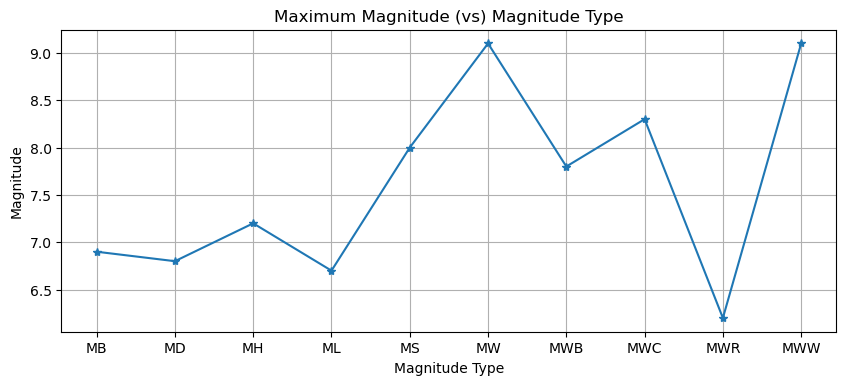

In [16]:
#Bi-variet graph depicting Maximum of Magniude earthquake grouped by the MagnitudeType
#Get access to figure object for customisation
plt.figure(figsize=(10,4), dpi=100)

df1 = df.copy()

#Check if any row is having 'nan' fill the data with any of the forward fill
if df1['Magnitude Type'].isnull().values.any():
    nan_index = df1.loc[df1['Magnitude Type'].isnull()].index
    print('Before: Elements with nan in Mangnitude Type\n')
    print(df1.loc[df1['Magnitude Type'].isnull()])
    print("indicies are \n",nan_index)
    df1['Magnitude Type'].fillna(method='ffill', inplace=True)
    print("\n After \n",df1.iloc[nan_index])

magnitude_series = df.groupby(by='Magnitude Type')['Magnitude'].max()
plt.plot(magnitude_series, marker = '*')
plt.xlabel('Magnitude Type')
plt.ylabel('Magnitude')
plt.title('Maximum Magnitude (vs) Magnitude Type')
plt.grid()
plt.savefig('Maximum_Magnitude_vs_Magnitude_Type.png')

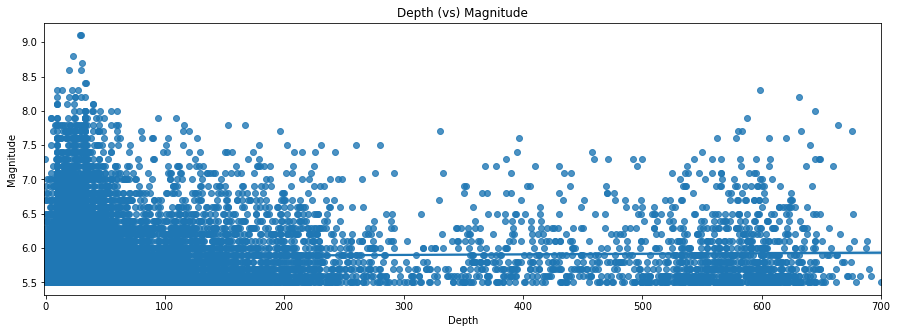

In [10]:
fig_dims = (15, 5)
fig, axs = plt.subplots(figsize=fig_dims)
axs.set_title('Depth (vs) Magnitude')
sns.regplot(data=df1, x='Depth', y='Magnitude', ax=axs)
plt.savefig('Depth_vs_Magnitude.png')

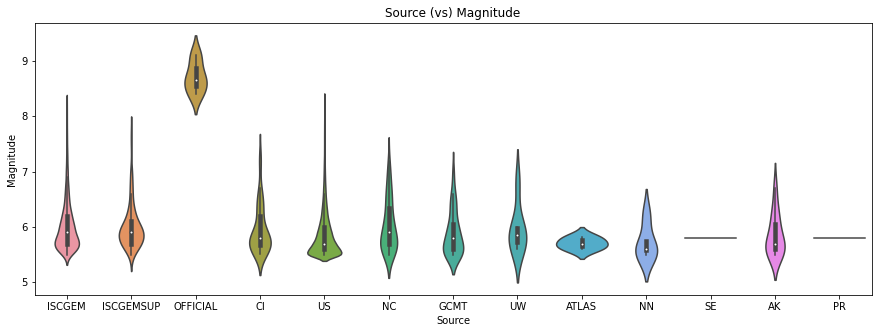

In [11]:
fig_dims = (15, 5)
fig, axs = plt.subplots(figsize=fig_dims)
axs.set_title('Source (vs) Magnitude')
sns.violinplot(data=df1, x='Source', y='Magnitude', ax=axs)
plt.savefig('Source_vs_Magnitude.png')

Figure(2400x2000)


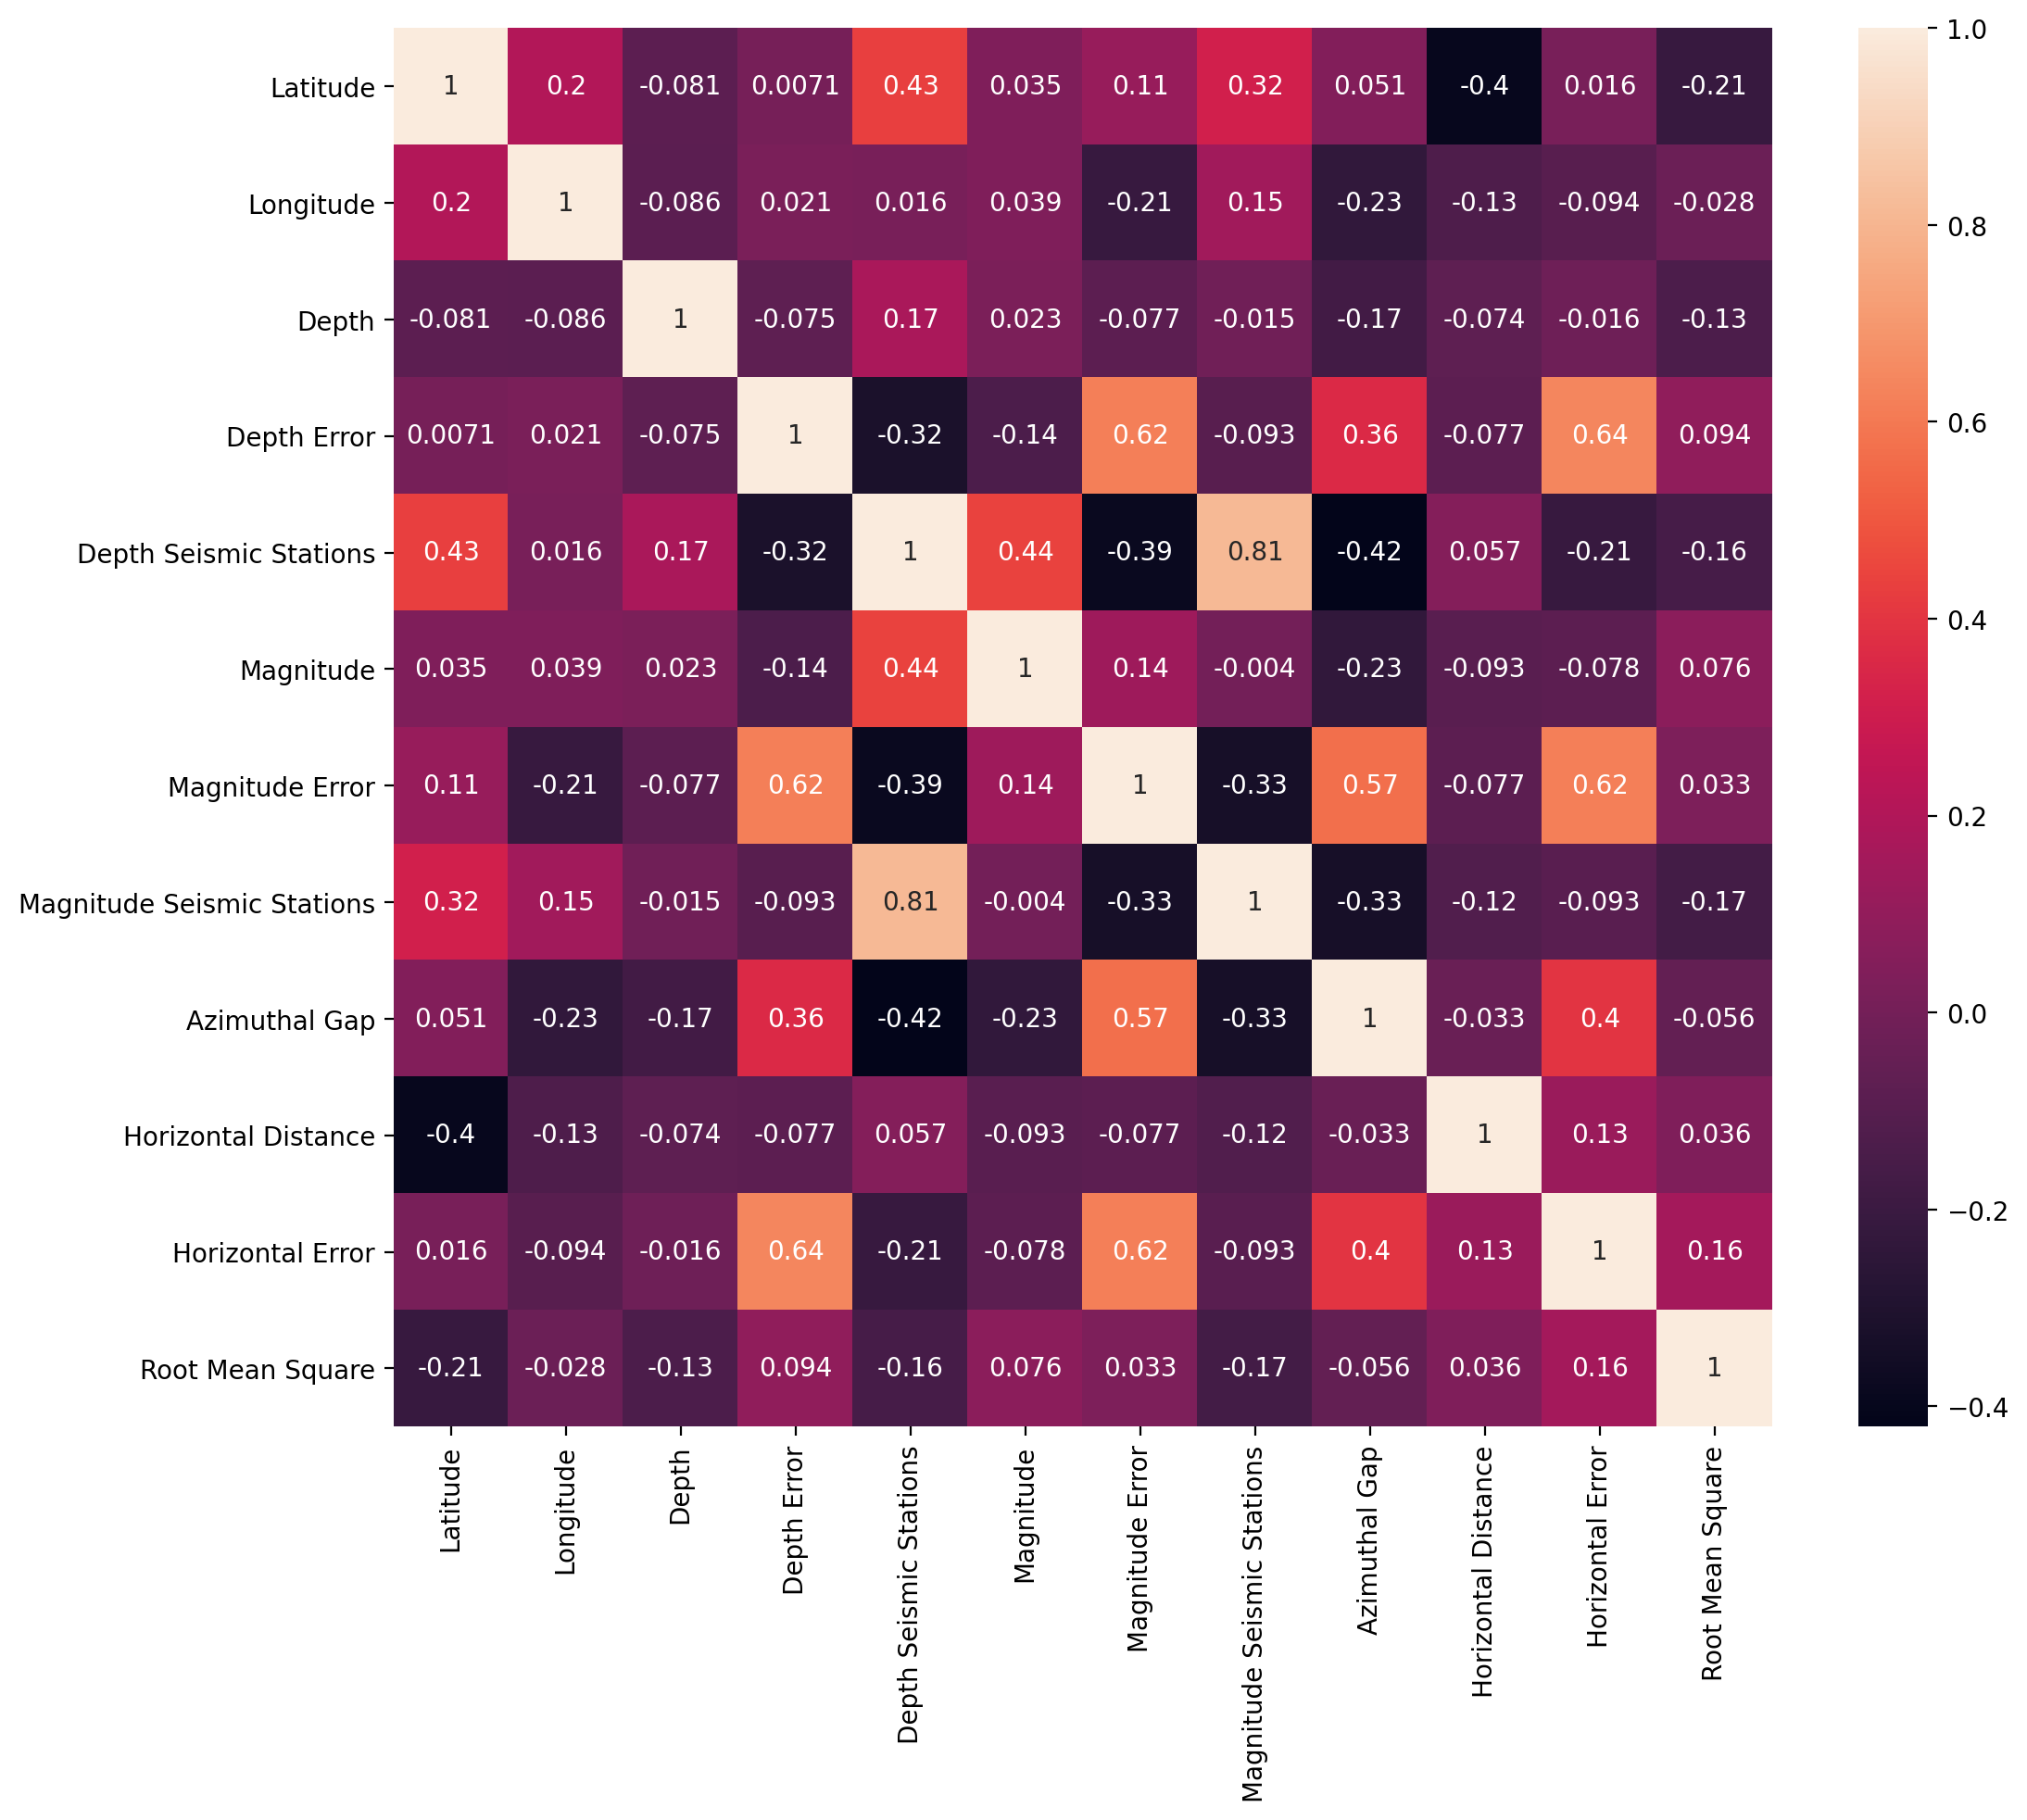

In [12]:
cmat = df1.corr()
plt.figure(figsize=(12,10), dpi=200)
sns.heatmap(cmat, annot=True)
f = plt.gcf()
print(f)

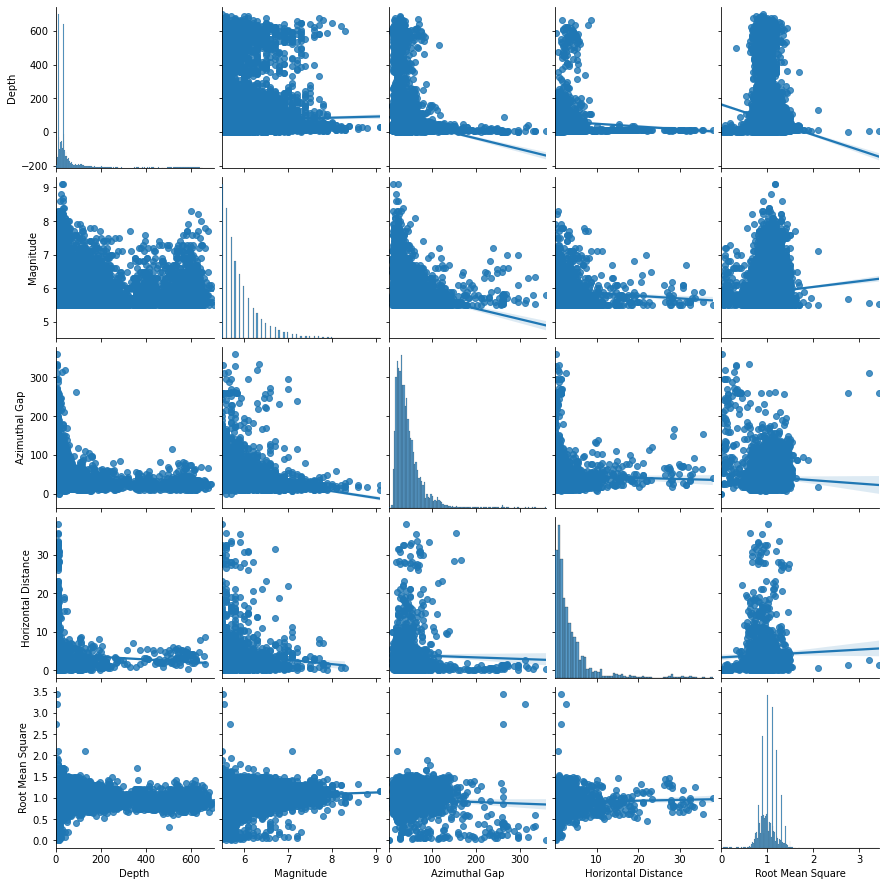

In [13]:
sns.pairplot(df1[['Depth','Magnitude','Azimuthal Gap','Horizontal Distance','Root Mean Square']], kind='reg')